In [6]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Linear import WordEmbeddingWithLinear

In [7]:
inputs = torch.tensor(
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], dtype=torch.float32
)
labels = torch.tensor(
    [[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0]], dtype=torch.float32
)

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [8]:
modelLinear = WordEmbeddingWithLinear()

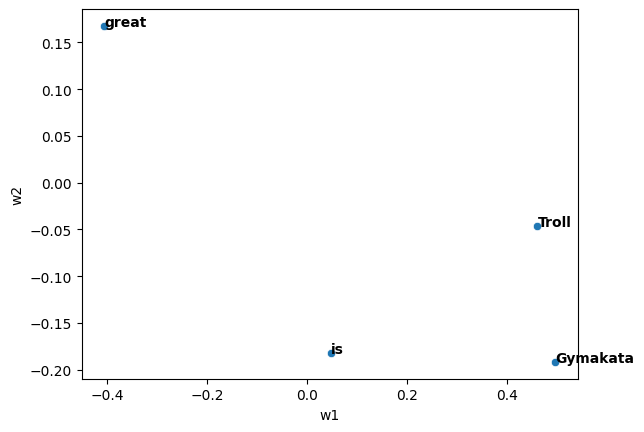

In [9]:
data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll", "is", "great", "Gymakata"],
    "output": ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
sns.scatterplot(x="w1", y="w2", data=df)
for line in range(0, df.shape[0]):
    plt.text(
        df.w1[line],
        df.w2[line],
        df.token[line],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )
plt.show()

In [10]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelLinear, train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | input_to_hidden  | Linear           | 8     
1 | hidden_to_output | Linear           | 8     
2 | loss             | CrossEntropyLoss | 0     
------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
/home/joacopolo/Documents/venvs/torch-venv/lib/python3.8/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
/home/joacopolo/Documents/venvs/torch

Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 259.26it/s, v_num=8]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 4/4 [00:00<00:00, 217.92it/s, v_num=8]


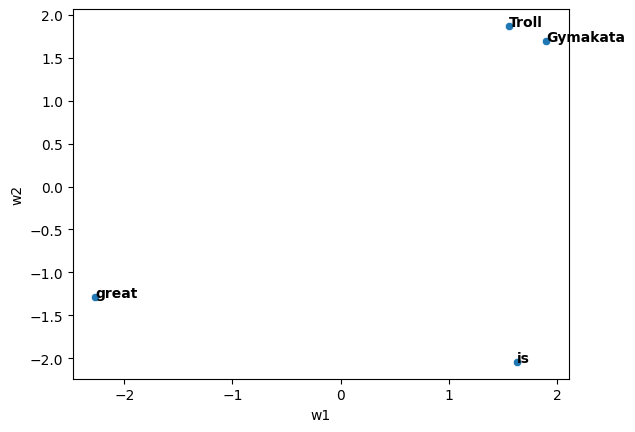

In [11]:
data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll", "is", "great", "Gymakata"],
    "output": ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
sns.scatterplot(x="w1", y="w2", data=df)
for line in range(0, df.shape[0]):
    plt.text(
        df.w1[line],
        df.w2[line],
        df.token[line],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )
plt.show()

In [12]:
modelLinear.input_to_hidden.weight

Parameter containing:
tensor([[ 1.5563,  1.6256, -2.2663,  1.9008],
        [ 1.8731, -2.0437, -1.2921,  1.6949]], requires_grad=True)

In [13]:
word_embedding = nn.Embedding.from_pretrained(modelLinear.input_to_hidden.weight.T)

In [15]:
word_embedding(torch.tensor(0))

tensor([1.5563, 1.8731])